# Matrices en NumPy

Además de arreglos, NumPy tiene otro tipo de dato que son las matrices.  Cuando trabajamos con arreglos, vimos que los operadores matemáticos +, -, *, / y otras funciones operan sobre cada elemento.  Con matrices, sabemos que los operadores matemáticos son muy diferentes, la multiplicación por ejemplo.

In [1]:
import numpy as np

In [2]:
matriz1 = np.matrix([[8, 2], [7, 3]])  # se puede abreviar el np.matrix como np.mat

In [3]:
matriz1

matrix([[8, 2],
        [7, 3]])

## Invertir la matriz

In [4]:
matriz1.I

matrix([[ 0.3, -0.2],
        [-0.7,  0.8]])

## Prueba de que es la matriz invertida

I es un atributo de las matrices que genera la matriz invertida

In [5]:
matriz1 * matriz1.I

matrix([[1.0000000e+00, 0.0000000e+00],
        [4.4408921e-16, 1.0000000e+00]])

## Otra forma de multiplicar matrices

In [8]:
x = np.array([[8, 2], [7, 3]])
y = np.array([[3], [4]])
print(x)
print(y)
x * y

[[8 2]
 [7 3]]
[[3]
 [4]]


array([[24,  6],
       [28, 12]])

In [7]:
z = np.mat(x) * np.mat(y)
z

matrix([[32],
        [33]])

##  Problema de ingeniería

### Enunciado del problema

Se midió la velocidad vertical de un cohete en tres tiempos diferentes, los resultados se ven en la siguiente tabla:


| Tiempo, t (s) | Velocidad, v (m/s) |
|---------------|--------------------|
|       5       |       106.8        |
|---------------|--------------------|
|       8       |        177.2       |
|---------------|--------------------|
|    12         |        279.2       |
|---------------|--------------------|



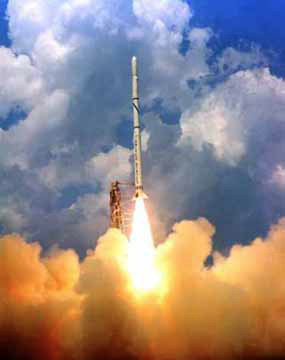

<center>Figura 1.  Un cohete lanzado al espacio</center>


La velocidad se aproxima por un polinomio como:  

<center>v(t) = at<sup>2</sup> + bt + c</center>

Desarrolle las ecuaciones en forma de matrices para encontrar los valores de a, b y c


###  Solución del problema

El polinomio pasará por los tres puntos (t1, v1), (t2, v2) y (t3, v3).  

De la tabla anterior establecemos:

<center>t1 = 5s, v1 = 106 m/s</center>
<center>t2 = 8s, v2 = 177.2 m/s</center>
<center>t3 = 12s, v3 = 279.2 m/s</center>

Usando nuestro polinomio tenemos:

<center>v(t1) = v1 = a*t1<sup>2</sup> + b*t1 + c</center>
<center>v(t2) = v2 = a*t2<sup>2</sup> + b*t2 + c</center>
<center>v(t3) = v3 = a*t3<sup>2</sup> + b*t3 + c</center>

Sustituyendo los datos:

<center>a(5<sup>2</sup>) + b(5) + c = 106</center>
<center>a(8<sup>2</sup>) + b(8) + c = 177.2</center>
<center>a(12<sup>2</sup>) +b(12) + c = 279.2</center>

o

<center>25a + 5b + c = 106</center>
<center>64a + 8b + c = 177.2</center>
<center>144a + 12b + c = 279.2</center>

Esto en forma matricial es:

$$ \left[ \begin{array}{ccc} 25a &  5b & c \\ 64a &  8b & c \\ 144a & 12b & c \\ \end{array} \right]
= \left[  \begin{array}{c} 106  \\  177.2  \\  279.2 \\ \end{array} \right]$$



Que es equivalente a:

$$ \left[ \begin{array}{ccc} 25 &  5 & 1 \\ 64 &  8 & 1 \\ 144 & 12 & 1 \\ \end{array} \right]
\left[ \begin{array}{ccc} a \\ b \\ c \\ \end{array} \right]
= \left[  \begin{array}{c} 106  \\  177.2  \\  279.2 \\ \end{array} \right]$$


Esto tiene el formato

A * B = C   donde A, B y C son matrices

Para despejar por B, necesitamos multiplicar ambos lados por la inversa de A (A<sup>-1</sup>), dando

A * A<sup>-1</sup> * B = C * A<sup>-1</sup>

B = C * A<sup>-1</sup>

ya que una matriz multiplicada por su inversa da la matriz identidad

Resolviendo en Python:


In [10]:
A = np.array([[25, 5, 1], [64, 8, 1], [144, 12, 1]])
C = np.array([[106], [177.2], [279.2]])

In [11]:
#  La matriz de los coeficientes a, b, y c se encuentra
#
try:
    B = np.mat(A).I * np.mat(C)
    print("Los coeficientes a, b y c son:\n", B)
except:
    print("Hubo un error, puede que la matriz A no tenga inversa ")

Los coeficientes a, b y c son:
 [[ 0.25238095]
 [20.45238095]
 [-2.57142857]]


In [12]:
#  Comprobacion para t = 5s

t = 5
a = float(B[0])
b = float(B[1])
c = float(B[2])
v = a * t**2 + b * t + c
print("La velocidad para t = 5s es:  ", v)

La velocidad para t = 5s es:   106.00000000000004


# Solución usando el sub-módulo numpy.linalg

Otra forma de resolverlo, sin tener que recurrir a matrices, es con una sub-librería de NumPy.  Esta sub-librería se llama numpy.linalg

Utilizando esta, resolveremos el problema desde el principio

In [13]:
A = np.array([[25, 5, 1], [64, 8, 1], [144, 12, 1]])
C = np.array([106, 177.2, 279.2])

# Usando la librería indicada

try:
              B = np.linalg.solve(A,C)
              print("Los coeficientes a, b y c son:  ", B)
except:
              print("Hubo un error, es posible que la matriz A no tenga una inversa")

Los coeficientes a, b y c son:   [ 0.25238095 20.45238095 -2.57142857]


# Visualizando la solución

Como reza el dicho:  "Una imagen vale más que mil palabras!"

Utilizaremos el módulo MatPlotLib para visualizar la velocidad del cohete versus el tiempo

Para esto necesitamos generar los datos de tiempo y velocidad.  Aprovecharemos las facilidades de NumPy para hacer esto.  Ahora que ya tenemos los valores de a, b y c, podemos establecer la ecuación exacta:

<center>v(t) = at<sup>2</sup> + bt + c</center>

y con los valores encontrados:

<center>v(t) = 0.2524t<sup>2</sup> + 20.4524t - 2.5714</center>

Con NumPy:

In [14]:
tiempo = np.arange(5, 13, 0.5)
velocidad =0.2524 * tiempo**2 + 20.4524 * tiempo - 2.5714
velocidad

array([106.0006, 117.5519, 129.2294, 141.0331, 152.963 , 165.0191,
       177.2014, 189.5099, 201.9446, 214.5055, 227.1926, 240.0059,
       252.9454, 266.0111, 279.203 , 292.5211])

Usando el módulo MatPlotLib

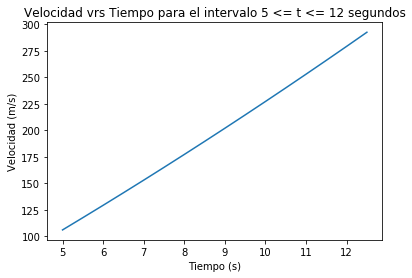

In [16]:
import matplotlib.pyplot as plt

plt.plot(tiempo, velocidad)
plt.title("Velocidad vrs Tiempo para el intervalo 5 <= t <= 12 segundos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.show()

Si ahora quisiéramos graficar la aceleracion en este mismo período, sabemos que:

$a(t) = dv(t)/dt$

para nuestro caso:

$a(t) = 2 * 0.2524t + 20.4524$

$a(t) = 0.5048t +20.4524$

Con NumPy esto es:

In [17]:
aceleracion = 0.5048 * tiempo + 20.4524

Y para graficarlo

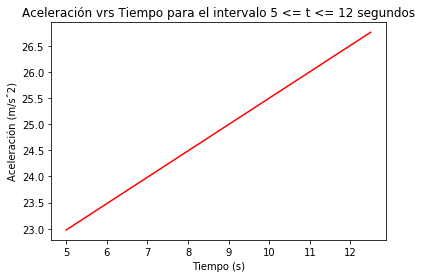

In [18]:
plt.plot(tiempo, aceleracion, color = "red")
plt.title("Aceleración vrs Tiempo para el intervalo 5 <= t <= 12 segundos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleración (m/sˆ2)")
plt.show()

# Multiples líneas en una gráfica

Podemos graficar las dos variables en una sola gráfica

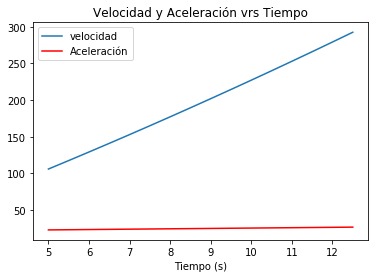

In [19]:
plt.plot(tiempo, velocidad, label = "velocidad")
plt.plot(tiempo, aceleracion, label = "Aceleración", color = "red")
plt.title("Velocidad y Aceleración vrs Tiempo")
plt.xlabel("Tiempo (s)")
plt.legend()
plt.show()

Viendo las gráficas individuales, parecería que la de velocidad es lineal y la de aceleración cambia bastante.  Colocando ambos trazos en una sola gráfica vemos que la aceleración no cambia mucho y por eso parece que la gráfica de la velocidad es lineal